In [1]:
from __future__ import print_function
__author__="gd"
import pylab as pl
import seaborn
import numpy as np
from scipy.optimize import curve_fit,minimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
distributions=["pois","gaus","chisq","exp","binom"]
md=dict.fromkeys(distributions,None)

In [3]:
mymean=100

## Chi-Square distribution

In [4]:
df=mymean

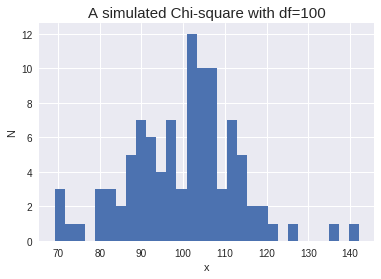

In [5]:
np.random.seed(123321)
md={}
md["chisq"]=np.random.chisquare(df,size=100)
pl.hist(md["chisq"],bins=30)
pl.ylabel("N")
pl.xlabel("x")
pl.title("A simulated Chi-square with df={}".format(df),fontsize=15)

**Figure1** The simulation of a random Chi square distribution with specified degrees of freedom. 

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.01, standard deviation: 13.11


In [7]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#print (mysize, mysize.shape)

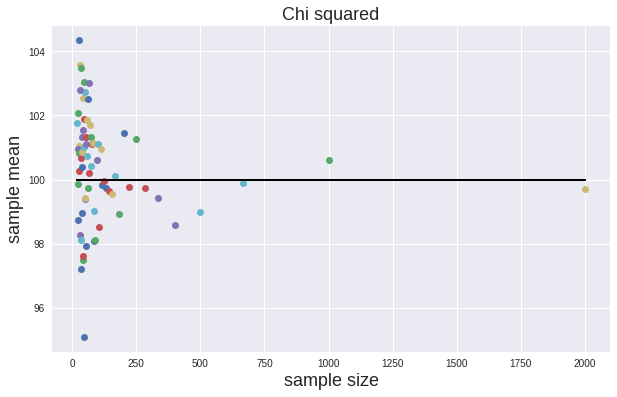

In [8]:
np.random.seed(123321)
md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

** Figure 2: **
Scatter plot of Sample Size vs Sample Means. Line at the theoretical sample mean. <br>
In the figure, we can observe that as the sample size increases,the sample mean becomes closer to the theoretical mean of 100. 

In [9]:
int(mysize.shape[0])+1

100

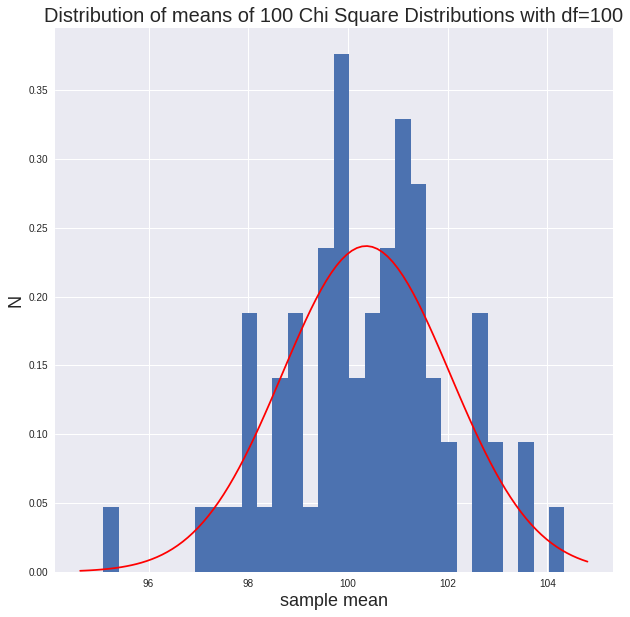

In [10]:
from scipy.stats import norm
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
bins=30
pl.hist(allmeans,bins,normed=True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18) #number of distributions with that mean.
pl.title("Distribution of means of {} Chi Square Distributions with df={}".format(int(mysize.shape[0])+1,df),fontsize=20)

#adding normal curve. The means will be distributed with mean= mu and std=std/n


muAll, stdAll = norm.fit(np.array(allmeans))
xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, muAll, stdAll)
plt.plot(x, p, 'r')

Reference for including normal: https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data 

**Figure 3** : The sample means are normally distributed. <br>

## Normal Distribution


In [11]:
mu,std=mymean,10

Gaussian mean: 99.90, standard deviation: 9.60


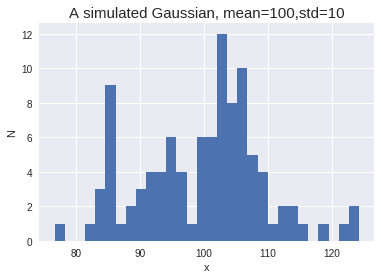

In [12]:
np.random.seed(123321)
md["gaus"]=np.random.normal(mu,std,size=100)
pl.hist(md["gaus"],bins=30)
pl.ylabel("N")
pl.xlabel("x")
pl.title("A simulated Gaussian, mean={},std={}".format(mu,std),fontsize=15)
print("Gaussian mean: {:.2f}, standard deviation: {:.2f}".format(md["gaus"].mean(),md["gaus"].std()))

** Figure 4 ** Simulated Normal distribution with specified mean and std. 

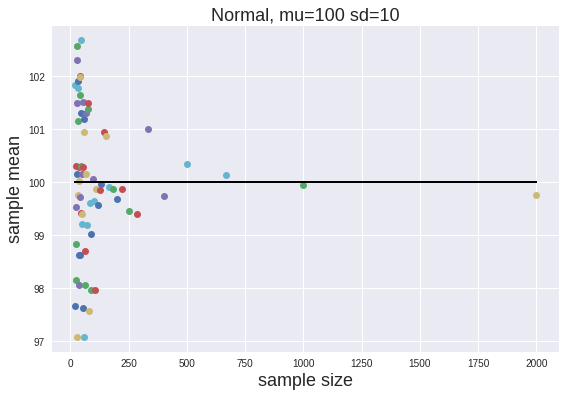

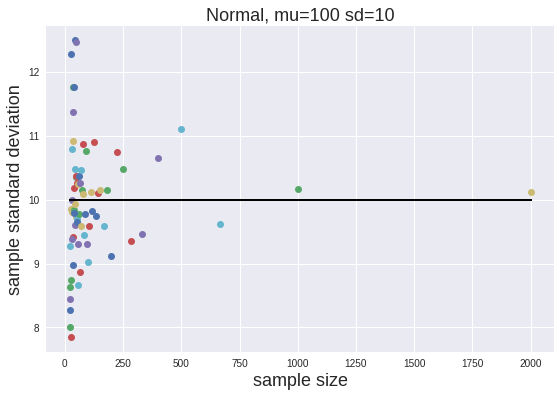

In [13]:
np.random.seed(123321)
md["gaus"]={}
for n in mysize:
    md["gaus"][n]=np.random.normal(mu,std,size=n)
md["gaus"]['means']={}
axigaus_mu_n=pl.figure(figsize=(20,6)).add_subplot(121)
for nn in md["gaus"]:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        axigaus_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axigaus_mu_n.set_xlabel('sample size', fontsize=18)
        axigaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axigaus_mu_n.set_title('Normal, mu={} sd={}'.format(mu,std), fontsize=18)
        axigaus_mu_n.plot([min(mysize), max(mysize)], [mu, mu], 'k')

md["gaus"]["std"]={}
axigaus_std_n=pl.figure(figsize=(20,6)).add_subplot(122)
for nn in md["gaus"]:
    if not type(nn) == str:
        md['gaus']['std'][nn] = md['gaus'][nn].std()
        axigaus_std_n.plot(nn, md['gaus']['std'][nn], 'o')
        axigaus_std_n.set_xlabel('sample size', fontsize=18)
        axigaus_std_n.set_ylabel('sample standard deviation', fontsize=18)
        axigaus_std_n.set_title('Normal, mu={} sd={}'.format(mu,std), fontsize=18)
        axigaus_std_n.plot([min(mysize), max(mysize)], [std,std], 'k')

** Figure 5 and 6 ** Scatter plot of sample size vs sample mean (Figure 5) and sample standard deviation. The black lines indicates theoretical mean and std. Illustration of law of large numbers -- as sample becames large the sample mean and std approach the theoretical value. 

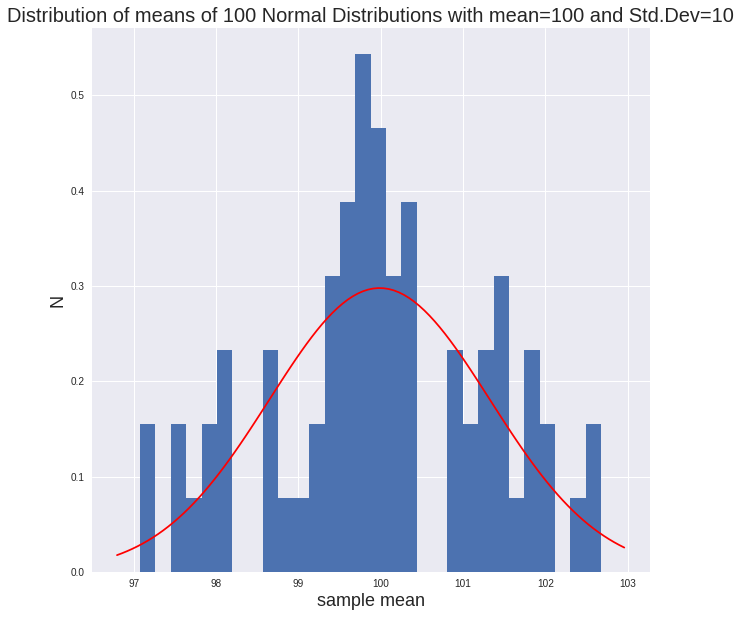

In [14]:
allmeans = list(md['gaus']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30,normed=True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18) #number of distributions with that mean.
pl.title("Distribution of means of {} Normal Distributions with mean={} and Std.Dev={}".format(int(mysize.shape[0])+1,mu,std),fontsize=20)

#adding normal curve. The means will be distributed with mean= mu and std=std/n


muAll, stdAll = norm.fit(np.array(allmeans))
xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, muAll, stdAll)
plt.plot(x, p, 'r')

** Figure 7** Disribution of 100 random normal distributions' means -- means are distributed normally.

## POISSON DISTRIBUTION

In [15]:
lamb=mymean

Poisson with lambda: 99.99


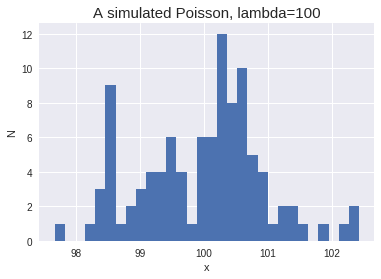

In [16]:
np.random.seed(123321)
md["pois"]=np.random.normal(lamb,size=100)
pl.hist(md["pois"],bins=30)
pl.ylabel("N")
pl.xlabel("x")
pl.title("A simulated Poisson, lambda={}".format(lamb),fontsize=15)
print("Poisson with lambda: {:.2f}".format(md["pois"].mean()))

** Figure 8 ** One random Poisson distribution with specified $ \lambda $.

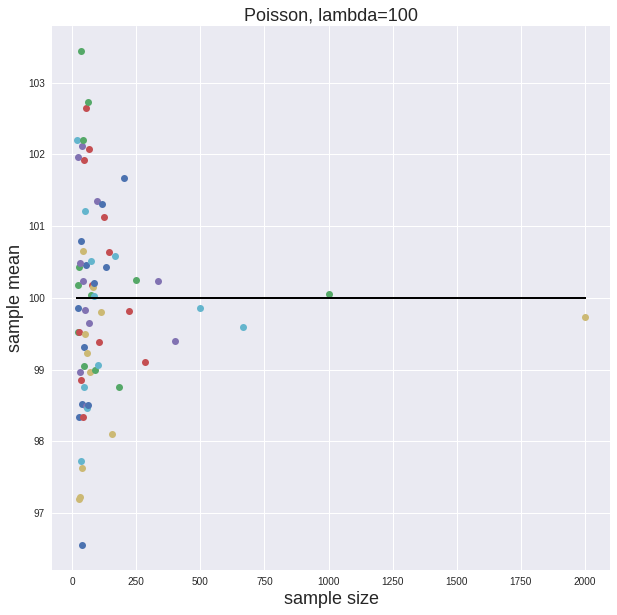

In [17]:
np.random.seed(123321)
md["pois"]={}
for n in mysize:
    md["pois"][n]=np.random.poisson(lamb,size=n)
md["pois"]['means']={}
axipois_mu_n=pl.figure(figsize=(10,10)).add_subplot(111)
for nn in md["pois"]:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        axipois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axipois_mu_n.set_xlabel('sample size', fontsize=18)
        axipois_mu_n.set_ylabel('sample mean', fontsize=18)
        axipois_mu_n.set_title('Poisson, lambda={}'.format(lamb), fontsize=18)
        axipois_mu_n.plot([min(mysize), max(mysize)], [lamb, lamb], 'k')

** Figure 9 ** Scatter plot of sample size vs sample mean. The black lines indicates theoretical mean. Illustration of law of large numbers -- as sample becames large the sample mean approache the theoretical value. 

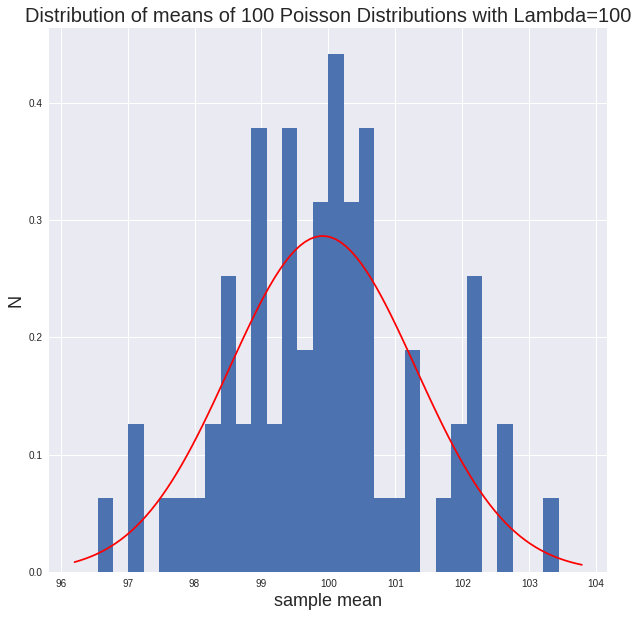

In [18]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30,normed=True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18) #distributions with that mean
pl.title("Distribution of means of {} Poisson Distributions with Lambda={}".format(int(mysize.shape[0])+1,lamb),fontsize=20)

#adding normal curve. The means will be distributed with mean= mu and std=std/n


muAll, stdAll = norm.fit(np.array(allmeans))
xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, muAll, stdAll)
plt.plot(x, p, 'r')

** Figure 10** Disribution of 100 random poisson distributions' means -- means are distributed normally.

## FOR EXPONENTIAL

In [19]:
beta=mymean

Poisson with beta: 95.50


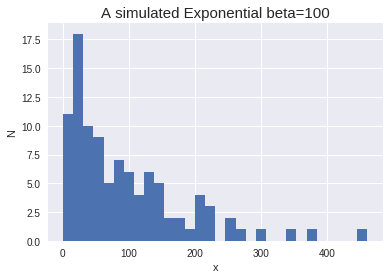

In [20]:
np.random.seed(123321)
md["exp"]=np.random.exponential(beta,size=100)
pl.hist(md["exp"],bins=30)
pl.ylabel("N")
pl.xlabel("x")
pl.title("A simulated Exponential beta={}".format(beta),fontsize=15)
print("Poisson with beta: {:.2f}".format(md["exp"].mean()))

** Figure 11 ** One random Exponential distribution with specified $ \beta $

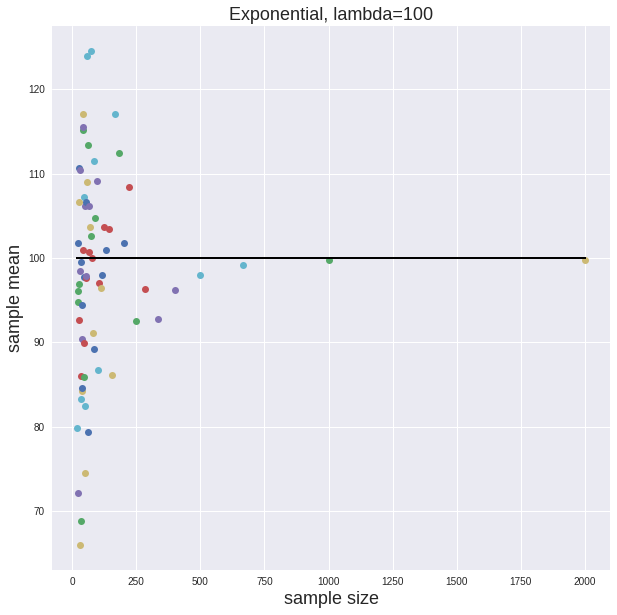

In [21]:
np.random.seed(123321)
md["exp"]={}
for n in mysize:
    md["exp"][n]=np.random.exponential(beta,size=n)
md["exp"]['means']={}
axiexp_mu_n=pl.figure(figsize=(10,10)).add_subplot(111)
for nn in md["exp"]:
    if not type(nn) == str:
        md['exp']['means'][nn] = md['exp'][nn].mean()
        axiexp_mu_n.plot(nn, md['exp']['means'][nn], 'o')
        axiexp_mu_n.set_xlabel('sample size', fontsize=18)
        axiexp_mu_n.set_ylabel('sample mean', fontsize=18)
        axiexp_mu_n.set_title('Exponential, lambda={}'.format(beta), fontsize=18)
        axiexp_mu_n.plot([min(mysize), max(mysize)], [beta, beta], 'k')

** Figure 12 ** Scatter plot of sample size vs sample mean. The black lines indicates theoretical mean. Illustration of law of large numbers -- as sample becames large the sample mean approache the theoretical value. 

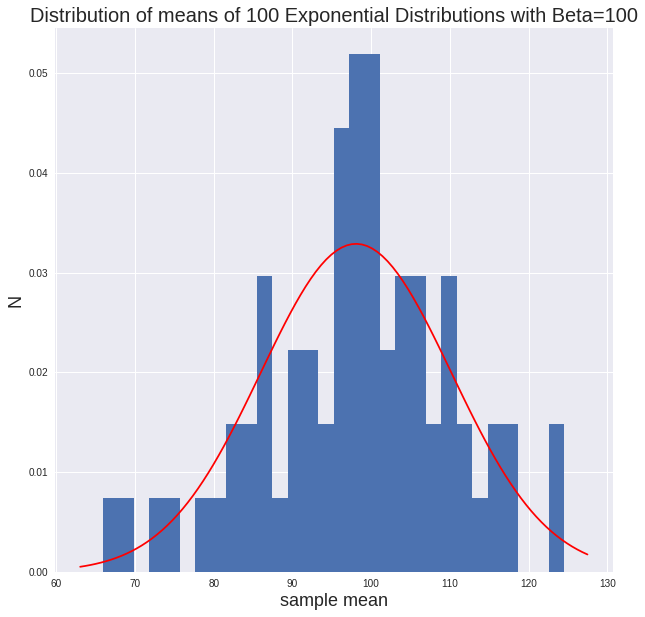

In [22]:
allmeans = list(md['exp']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30,normed=True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18) #distributions with that mean
pl.title("Distribution of means of {} Exponential Distributions with Beta={}".format(int(mysize.shape[0])+1,lamb),fontsize=20)

#adding normal curve. The means will be distributed with mean= mu and std=std/n


muAll, stdAll = norm.fit(np.array(allmeans))
xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, muAll, stdAll)
plt.plot(x, p, 'r')

** Figure 13** Disribution of 100 random exponential distributions sample means-- means are distributed normally.

## Binomial distribution

In [23]:
nu,p=mymean*2,0.5

Binomial with mean: 100.59


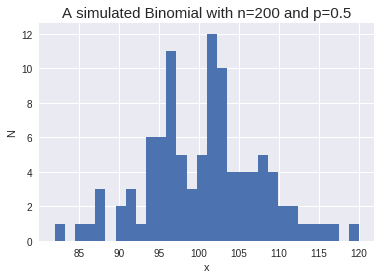

In [24]:
np.random.seed(123321)
md["binom"]=np.random.binomial(nu,p,size=100)
pl.hist(md["binom"],bins=30)
pl.ylabel("N")
pl.xlabel("x")
pl.title("A simulated Binomial with n={} and p={}".format(nu,p),fontsize=15)
print("Binomial with mean: {:.2f}".format(md["binom"].mean()))

** Figure 14 ** One random Binomial distribution with specified $ n $ and $ p $.

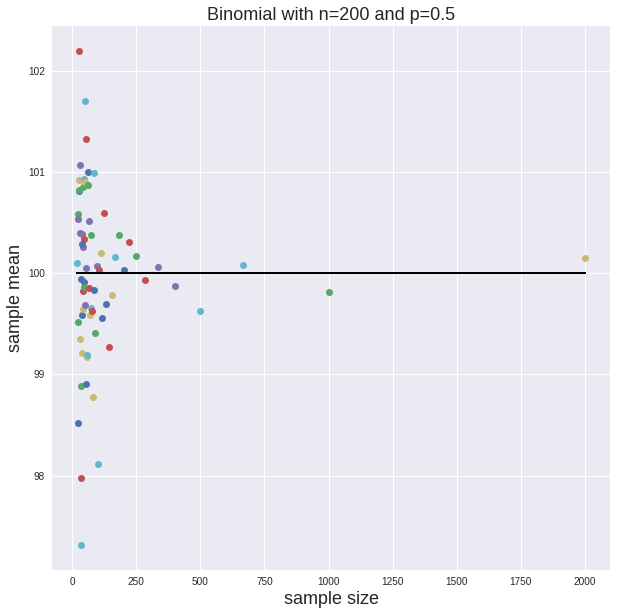

In [25]:
np.random.seed(123321)
md["binom"]={}
for n in mysize:
    md["binom"][n]=np.random.binomial(nu,p,size=n)
md["binom"]['means']={}
axibinom_mu_n=pl.figure(figsize=(10,10)).add_subplot(111)
for nn in md["binom"]:
    if not type(nn) == str:
        md['binom']['means'][nn] = md['binom'][nn].mean()
        axibinom_mu_n.plot(nn, md['binom']['means'][nn], 'o')
        axibinom_mu_n.set_xlabel('sample size', fontsize=18)
        axibinom_mu_n.set_ylabel('sample mean', fontsize=18)
        axibinom_mu_n.set_title('Binomial with n={} and p={}'.format(nu,p), fontsize=18)
        axibinom_mu_n.plot([min(mysize), max(mysize)], [beta, beta], 'k')

** Figure 15 ** Scatter plot of sample size vs sample mean. The black lines indicates theoretical mean. Illustration of law of large numbers -- as sample becames large the sample mean approache the theoretical value. 

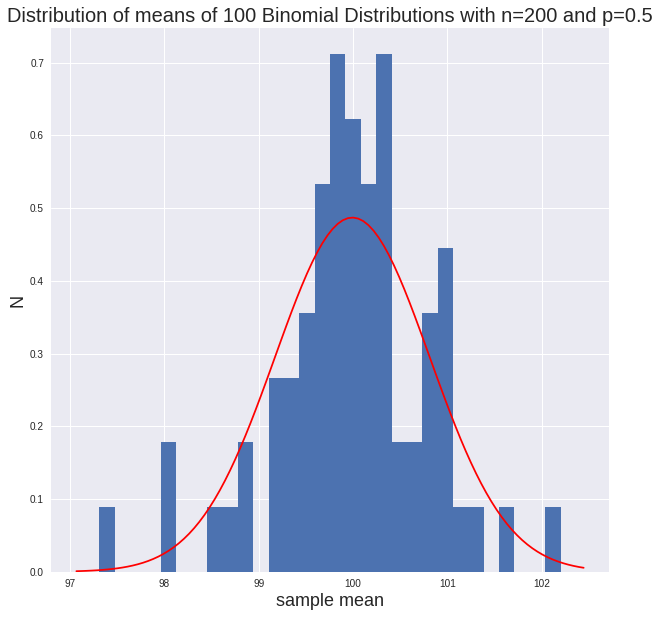

In [26]:
allmeans = list(md['binom']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30,normed=True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18) #distributions with that mean
pl.title("Distribution of means of {} Binomial Distributions with n={} and p={}".format(int(mysize.shape[0])+1,nu,p),fontsize=20)

#adding normal curve. The means will be distributed with mean= mu and std=std/n


muAll, stdAll = norm.fit(np.array(allmeans))
xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, muAll, stdAll)
plt.plot(x, p, 'r')

** Figure 16** Disribution of 100 random binomial distributions' sample means-- means are distributed normally.